# Orders

✏️ **Exercise**

Today, we will investigate the **orders**, and their associated **review score**.

👉 Our goal is to create a DataFrame with the following features:


| feature_name 	| type 	| description 	|
|:---	|:---:	|:---	|
| `order_id` 	| str 	| the id of the order 	|
| `wait_time` 	| float 	| the number of days between order_date and delivered_date 	|
| `expected_wait_time` 	| float 	| the number of days between order_date and estimated_delivery_date 	|
| `delay_vs_expected` 	| float 	| if the actual delivery date is later than the estimated delivery date, returns the number of days between the two dates, otherwise return 0 	|
| `order_status` 	| str 	| the status of the order 	|
| `dim_is_five_star` 	| int 	| 1 if the order received a five-star review, 0 otherwise 	|
| `dim_is_one_star` 	| int 	| 1 if the order received a one_star, 0 otherwise 	|
| `review_score` 	| int 	| from 1 to 5 	|
| `number_of_products` 	| int 	| number of products that the order contains 	|
| `number_of_sellers` 	| int 	| number of sellers involved in the order 	|
| `price` 	| float 	| total price of the order paid by customer 	|
| `freight_value` 	| float 	| value of the freight paid by customer 	|
| `distance_customer_seller` 	| float 	| the distance in km between customer and seller (optional) 	|  
  
⚠️ We also want to filter out "non-delivered" orders, unless explicitly specified, otherwise we cannot compute the potential delays.

❓ **Your challenge**: 

- Implement each feature as a separate method within the `Order` class available at `olist/order.py`
- Then, create a method `get_training_data()` that returns the complete DataFrame **without `NaN`s**.

💡 Suggested methodology:
- Use the notebook below to write and test your code step-by-step first
- Then copy the code into `order.py` once you are certain of your code logic
- Focus on the data manipulation logic now, we will analyse the dataset visually in the next challenges

🔥 Notebook best practices (must-read) 👇

<details>
    <summary>▸ <i>click here</i></summary>

From now on, exploratory notebooks are going to become pretty long, and we strongly advise you to follow these notebook principles:
- Code your logic so that your Notebook can always be ran from top to bottom without crashing (Cell --> Run All)
- Name your variables carefully 
- Use dummy names such as `tmp` or `_` for intermediary steps when you know you won't need them for long
- Clear your code and merge cells when relevant to minimize Notebook size (`Shift-M`)
- Hide your cell output if you don't need to see it anymore (double-click on the red `Out[]:` section to the left of your cell).
- Make heavy use of jupyter nbextention `Collapsible Headings` and `Table of Content` (call a TA if you can't find them)
- Use the following shortcuts 
    - `a` to insert a cell above
    - `b` to insert a cell below
    - `dd` to delete a cell
    - `esc` and `arrows` to move between cells
    - `Shift-Enter` to execute cell and move focus to the next one
    - use `Shift + Tab` when you are between method brackets e.g. `groupby()` to get the docs! Repeat a few times to open it permanently

</details>





In [1]:
# Auto reload imported module every time a jupyter cell is executed (handy for olist.order.py updates)
%load_ext autoreload
%autoreload 2

In [2]:
# Import usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import olist data
from olist.data import Olist
olist = Olist()
data = olist.get_data()

In [4]:
# What datasets do we have access to now ? 
data.keys()

dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])

In [5]:
orders = data['orders'].copy() # good practice to be sure not to modify your `data` variable

assert(orders.shape == (99441, 8))

## 1. Code `order.py`

### a) `get_wait_time`
    ❓ Return a Dataframe with:
           order_id, wait_time, expected_wait_time, delay_vs_expected, order_status


🎁 We give you the pseudo-code below 👇 for this first method:

> 1. Inspect the `orders` dataframe
2. Filter the dataframe on `delivered orders`
3. Handle `datetime`
    - Take time to understand what python [`datetime`](https://docs.python.org/3/library/datetime.html) objects are
    - and convert dates from "string" type to "pandas.datetime' using [`pandas.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
4. Compute `wait_time`
5. Compute `expected_wait_time`
6. Compute `delay_vs_expected`
7. Check the new dataframe 
8. Once you are satisfied with your code, you can carefully copy-paste it from the notebook to to `olist/order.py`

<details>
    <summary>💡Hint</summary>

For both `wait_time` and `delay_vs_expected`, you need to subtract the relevant dates/timestamps to get the time difference between the `pandas.datetime` objects. Then, you can either use [`datetime.timedelta()`](https://docs.python.org/3/library/datetime.html#timedelta-objects) or [`np.timedelta64()`](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-and-timedelta-arithmetic) to find out how many days that subtraction represents!

</details>

In [6]:
columns = list(orders.columns)

In [7]:
print(f"""
{orders.info()}
{display(orders.isna().sum())}

""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


None
None




In [8]:
for column in columns:
    if column.endswith("timestamp") or column.endswith("date"):
        orders[column] = pd.to_datetime(orders[column])
        print(f"""
{column = }
{orders[column].dtypes = }""")
        
        


column = 'order_purchase_timestamp'
orders[column].dtypes = dtype('<M8[ns]')

column = 'order_delivered_carrier_date'
orders[column].dtypes = dtype('<M8[ns]')

column = 'order_delivered_customer_date'
orders[column].dtypes = dtype('<M8[ns]')

column = 'order_estimated_delivery_date'
orders[column].dtypes = dtype('<M8[ns]')


In [9]:
orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
99436    8 days 05:13:56
99437   22 days 04:38:58
99438   24 days 20:37:34
99439   17 days 02:04:27
99440    7 days 16:11:00
Length: 99441, dtype: timedelta64[ns]

In [10]:
# Compute just the number of days in each time_delta 
import datetime
one_day_delta = datetime.timedelta(days=1) # a "timedelta" object of 1 day
# one_day_delta = np.timedelta64(24, 'h') # a "timedelta64" object of 1 day (use the one you prefer)

# Assign compute delay vs expected
orders.loc[:,'wait_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta

orders.loc[:,'delay_vs_expected'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']) / one_day_delta

orders.loc[:,'expected_wait_time'] = (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']) / one_day_delta

orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
wait_time                               float64
delay_vs_expected                       float64
expected_wait_time                      float64
dtype: object

In [11]:
# # There is a pandas method called dt.days to compute time differences
# # But this is less interesting because it rounds time differences to days... but 8.9 days is worse than 8.1 days for instance
# (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

In [12]:
# # We could use pandas' built in .clip method to remove anything below 0
# # orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].clip(0)

# # Or write a custom function and apply it to the column
# def handle_delay(x):
#     if x > 0:
#         return x
#     else:
#         return 0

# orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].apply(handle_delay)

In [13]:
display(orders[['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected']])
orders[['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected']].dtypes

,order_id,wait_time,expected_wait_time,delay_vs_expected
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,-7.107488
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,-5.355729
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,-17.245498
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,-12.980069
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,-9.238171
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,-10.369433
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,-1.265324
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,-5.524803
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,-20.018819


order_id               object
wait_time             float64
expected_wait_time    float64
delay_vs_expected     float64
dtype: object

In [14]:
orders[ 'delay_vs_expected'].head()

0    -7.107488
1    -5.355729
2   -17.245498
3   -12.980069
4    -9.238171
Name: delay_vs_expected, dtype: float64

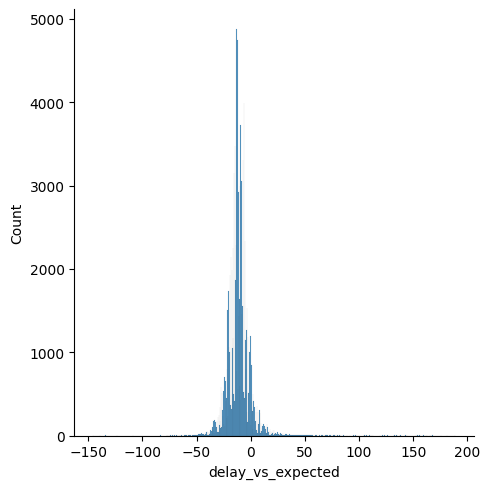

In [15]:
sns.displot(orders['delay_vs_expected'])

👀 Check the dataframe you've just created. <br/> 

💪 When your code works, commit it to `olist/order.py` <br/>

🧪 Now, test it by running the following cell 👇 

In [16]:
# Test your code here
from olist.order import Order
Order().get_wait_time()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered


In [17]:
from nbresult import ChallengeResult
test = Order().get_wait_time()
result = ChallengeResult('wait_time', dve_type=test["delay_vs_expected"].dtype, shape=test.shape, dve_min=test["delay_vs_expected"].min(), dve_max=test["delay_vs_expected"].max())
result.write(); print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/abellan/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/abellan/code/Juan-Abellan/W3_Decision_Science/W3.2_Statistical_Inference/data-orders/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_wait_time.py::TestWaitTime::test_wait_time PASSED                   [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/wait_time.pickle

git commit -m 'Completed wait_time step'

git push origin master



### b) `get_review_score`
     ❓ Returns a DataFrame with:
        order_id, dim_is_five_star, dim_is_one_star, review_score

dim_is_$N$_star should contain `1` if review_score=$N$ and `0` otherwise 

<details>
    <summary markdown='span'>Hints</summary>

Think about `Series.map()` or `DataFrame.apply()`
    
</details>

👉 We load the `reviews` for you

In [18]:
data = olist.get_data()
data.keys()

dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])

In [19]:
reviews = data['order_reviews'].copy()
assert(reviews.shape == (99224,7))
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [20]:
# dim_is_one_star = lambda x: int(x==1)
# dim_is_five_star = lambda x: int(x==5)

def starts_rating_1(x):
#     if x == 1:
#         return 1
#     else:
#         return 0
    return 1 if x==1 else  0
    
def starts_rating_5(x):
#     if x == 5:
#         return 1
#     else:
#         return 0
    return 1 if x==5 else  0
    
    

reviews["dim_is_five_star"] = reviews["review_score"].apply(starts_rating_5) # --> Series([0, 1, 1, 0, 0, 1 ...])
reviews["dim_is_one_star"] = reviews["review_score"].apply(starts_rating_1) # --> Series([0, 1, 1, 0, 0, 1 ...])

In [21]:
reviews[["order_id", "dim_is_five_star", "dim_is_one_star", "review_score"]]

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


Once again, 

👀 Check the dataframe you've just created. <br/> 

💪 When your code works, commit it to `olist/order.py` <br/>

🧪 Now, test it by running the following cell 👇 

In [22]:
# Test your code here
from olist.order import Order
Order().get_review_score()

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


In [23]:
from nbresult import ChallengeResult
result = ChallengeResult('review_score', shape=Order().get_review_score().shape)
result.write(); print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/abellan/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/abellan/code/Juan-Abellan/W3_Decision_Science/W3.2_Statistical_Inference/data-orders/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_review_score.py::TestReviewScore::test_review_score PASSED          [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/review_score.pickle

git commit -m 'Completed review_score step'

git push origin master



### c) `get_number_products`:
     ❓ Returns a DataFrame with:
        order_id, number_of_products (total number of products per order)

In [24]:
data = olist.get_data()

In [25]:
print(f"""
{type(data) = }
{data.keys() = }
""")


type(data) = <class 'dict'>
data.keys() = dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])



In [26]:
print(f"""
{type(data["order_items"]) = }

{data["order_items"].columns = }

{data["order_items"].isna().sum()}

{data["order_items"].dtypes = }

{display(data["order_items"].head(10))}

{display(data["order_items"].info())}
""")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None


type(data["order_items"]) = <class 'pandas.core.frame.DataFrame'>

data["order_items"].columns = Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

data["order_items"].dtypes = order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

None

None



In [27]:
data["order_items"][['order_id', 'order_item_id', 'product_id', 'price']].sort_values('order_id')

print(f"""
{display(data["order_items"].groupby('order_id').count()['order_item_id'])}
{display(data["order_items"].groupby('order_id').count()[['order_item_id','product_id']].rename(columns={"order_item_id": "number_of_products"}))}
{display(data["order_items"].groupby('order_id').count()[['order_item_id','product_id']].rename(columns={"order_item_id": "number_of_products"}).sort_values("number_of_products")[['number_of_products']])}
""")

order_id
00010242fe8c5a6d1ba2dd792cb16214    1
00018f77f2f0320c557190d7a144bdd3    1
000229ec398224ef6ca0657da4fc703e    1
00024acbcdf0a6daa1e931b038114c75    1
00042b26cf59d7ce69dfabb4e55b4fd9    1
                                   ..
fffc94f6ce00a00581880bf54a75a037    1
fffcd46ef2263f404302a634eb57f7eb    1
fffce4705a9662cd70adb13d4a31832d    1
fffe18544ffabc95dfada21779c9644f    1
fffe41c64501cc87c801fd61db3f6244    1
Name: order_item_id, Length: 98666, dtype: int64

,number_of_products,product_id
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,1,1
00018f77f2f0320c557190d7a144bdd3,1,1
000229ec398224ef6ca0657da4fc703e,1,1
00024acbcdf0a6daa1e931b038114c75,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1
...,...,...
fffc94f6ce00a00581880bf54a75a037,1,1
fffcd46ef2263f404302a634eb57f7eb,1,1
fffce4705a9662cd70adb13d4a31832d,1,1


,number_of_products
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
a6e9d106235bcf1dda54253686d89e99,1
a6e9b80a7636eb8dd592dbb3e20d0a91,1
a6e963c11e80432334e984ead4797a8b,1
a6e8ad5db31e71f5f12671af561acb4a,1
...,...
428a2f660dc84138d969ccd69a0ab6d5,15
9ef13efd6949e4573a18964dd1bbe7f5,15
1b15974a0141d54e36626dca3fdc731a,20



None
None
None



In [28]:
{display(data["order_items"].groupby('order_id').count()[['order_item_id','product_id']].rename(columns={"order_item_id": "number_of_products"}).sort_values("number_of_products")[['number_of_products']])}

,number_of_products
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
a6e9d106235bcf1dda54253686d89e99,1
a6e9b80a7636eb8dd592dbb3e20d0a91,1
a6e963c11e80432334e984ead4797a8b,1
a6e8ad5db31e71f5f12671af561acb4a,1
...,...
428a2f660dc84138d969ccd69a0ab6d5,15
9ef13efd6949e4573a18964dd1bbe7f5,15
1b15974a0141d54e36626dca3fdc731a,20


{None}

🧪 Same routine: 
* check your dataframe, 
* commit your code to `olist/order.py`
* and check that it truly works.

In [29]:
from nbresult import ChallengeResult
result = ChallengeResult('number_products', shape=Order().get_number_products().shape)
result.write(); print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/abellan/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/abellan/code/Juan-Abellan/W3_Decision_Science/W3.2_Statistical_Inference/data-orders/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_number_products.py::TestNumberProducts::test_review_score PASSED    [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/number_products.pickle

git commit -m 'Completed number_products step'

git push origin master



### d) `get_number_sellers`:
     ❓ Returns a DataFrame with:
        order_id, number_of_sellers (total number of unique sellers per order)
        
<details>
    <summary>▸ <i>Hint</i></summary>

`pd.Series.nunique()`
</details>

In [30]:
print(f"""
{type(data['order_items']) = }

{data['order_items'].isna().sum() = }

{data['order_items'].dtypes = }

{list(data['order_items'].columns) = }
""")


type(data['order_items']) = <class 'pandas.core.frame.DataFrame'>

data['order_items'].isna().sum() = order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

data['order_items'].dtypes = order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

list(data['order_items'].columns) = ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']



In [31]:
print(f"""
{display(data['order_items'][['order_id', 'seller_id']]) = }
{display(len(data['order_items'][['order_id', 'seller_id']].groupby('order_id'))) = }
{display(data['order_items'][['order_id', 'seller_id']].groupby('order_id').nunique(dropna=True).reset_index()) = }
{display(data['order_items'][['order_id', 'seller_id']].groupby('order_id').nunique(dropna=True).reset_index()) = }
""")

,order_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c
112646,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182
112647,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53
112648,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79


98666

,order_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


,order_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1



display(data['order_items'][['order_id', 'seller_id']]) = None
display(len(data['order_items'][['order_id', 'seller_id']].groupby('order_id'))) = None
display(data['order_items'][['order_id', 'seller_id']].groupby('order_id').nunique(dropna=True).reset_index()) = None
display(data['order_items'][['order_id', 'seller_id']].groupby('order_id').nunique(dropna=True).reset_index()) = None



In [32]:
sellers = data['order_items'].groupby('order_id')['seller_id'].nunique().reset_index()
sellers
sellers.columns = ['order_id', 'number_of_sellers']
sellers.sort_values('number_of_sellers')

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
65559,aaaf314a8cf0d0da71e52c6cd4184cbd,1
65558,aaaea350ff8a957595f3c631d6b63d1b,1
65557,aaae80f5b6239bd9e1b22e9aa542c3e8,1
65556,aaabf43feb9498d9de4588eb73231c25,1
...,...,...
11231,1d23106803c48c391366ff224513fb7f,4
53796,8c2b13adf3f377c8f2b06b04321b0925,4
55847,91be51c856a90d7efe86cf9d082d6ae3,4
79967,cf5c8d9f52807cb2d2f0a0ff54c478da,5


In [33]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
Order().get_number_sellers()

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


In [34]:
from nbresult import ChallengeResult
result = ChallengeResult('number_sellers', shape=Order().get_number_sellers().shape)
result.write(); print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/abellan/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/abellan/code/Juan-Abellan/W3_Decision_Science/W3.2_Statistical_Inference/data-orders/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_number_sellers.py::TestNumberSellers::test_number_seller PASSED     [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/number_sellers.pickle

git commit -m 'Completed number_sellers step'

git push origin master



### e) `get_price_and_freight`
     Returns a DataFrame with:
        order_id, price, freight_value

<details>
    <summary>▸ <i>Hint</i></summary>

`pd.Series.agg()` allows you to apply one transformation method per column of your groupby object
</details>

In [35]:
print(f"""
{display(data['order_items'].info())}

{display(data['order_items'][["order_id", "price", "freight_value"]])}

{display(data['order_items'][["order_id", "price", "freight_value"]].groupby("order_id", as_index = False))}

{display(data['order_items'][["order_id", "price", "freight_value"]].groupby("order_id", as_index = False).agg({'price': 'sum', 'freight_value': 'sum'}))}
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,55.99,8.72


,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72



None

None

None

None



In [36]:
price_freight = data['order_items'].groupby('order_id', as_index=False).agg({'price': 'sum','freight_value': 'sum'})
price_freight

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


In [37]:
from nbresult import ChallengeResult
result = ChallengeResult('price', shape=Order().get_price_and_freight().shape)
result.write(); print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/abellan/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/abellan/code/Juan-Abellan/W3_Decision_Science/W3.2_Statistical_Inference/data-orders/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_price.py::TestPrice::test_price PASSED                              [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/price.pickle

git commit -m 'Completed price step'

git push origin master



### e) [OPTIONAL] `get_distance_seller_customer` 
**(Try  to code this function only after finishing today's challenges - Skip to next section)**

    ❓ Returns a Dataframe with:
        order_id, distance_seller_customer (the distance in km between customer and seller)

💡Have a look at the `haversine_distance` formula we coded for you in the `olist.utils` module

In [38]:
# YOUR CODE HERE

In [39]:
# SOLUTION:
matching_geo = Order().get_distance_seller_customer()
matching_geo

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.005664
1,00018f77f2f0320c557190d7a144bdd3,589.274140
2,000229ec398224ef6ca0657da4fc703e,312.495046
3,00024acbcdf0a6daa1e931b038114c75,301.951753
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.221788
...,...,...
98172,fffc94f6ce00a00581880bf54a75a037,2755.314485
98173,fffcd46ef2263f404302a634eb57f7eb,354.848852
98174,fffce4705a9662cd70adb13d4a31832d,338.827218
98175,fffe18544ffabc95dfada21779c9644f,72.870476


👉 Let's quickly check the distribution of the distance seller-customer :)

In [40]:
sns.displot(data = matching_geo, x ='distance_seller_customer')

👉 What is the median seller-customer distance ?

In [41]:
matching_geo['distance_seller_customer'].describe()

count    98177.000000
mean       601.961534
std        596.877838
min          0.000000
25%        186.380313
50%        433.698770
75%        798.435455
max       8736.947618
Name: distance_seller_customer, dtype: float64

⚠️ Since an order can have multiple sellers, inspect the average seller-customer distance per order.

In [42]:
average_order_distance = matching_geo.groupby("order_id", as_index=False).agg(
    {"distance_seller_customer": "mean"}
)
average_order_distance

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.005664
1,00018f77f2f0320c557190d7a144bdd3,589.274140
2,000229ec398224ef6ca0657da4fc703e,312.495046
3,00024acbcdf0a6daa1e931b038114c75,301.951753
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.221788
...,...,...
98172,fffc94f6ce00a00581880bf54a75a037,2755.314485
98173,fffcd46ef2263f404302a634eb57f7eb,354.848852
98174,fffce4705a9662cd70adb13d4a31832d,338.827218
98175,fffe18544ffabc95dfada21779c9644f,72.870476


In [43]:
average_order_distance.describe()

,distance_seller_customer
count,98177.000000
mean,601.961534
std,596.877838
min,0.000000
25%,186.380313
50%,433.698770
75%,798.435455
max,8736.947618


👀 Check your new dataframe and commit your code to olist/order.py when it works. 

In [44]:
Order().get_distance_seller_customer()['distance_seller_customer']

0         301.005664
1         589.274140
2         312.495046
3         301.951753
4         646.221788
            ...     
98172    2755.314485
98173     354.848852
98174     338.827218
98175      72.870476
98176     133.230980
Name: distance_seller_customer, Length: 98177, dtype: float64

🧪  Test your code

In [45]:
from nbresult import ChallengeResult

result = ChallengeResult('distance',
    mean = Order().get_distance_seller_customer()['distance_seller_customer'].mean())
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/abellan/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/abellan/code/Juan-Abellan/W3_Decision_Science/W3.2_Statistical_Inference/data-orders/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_distance.py::TestDistance::test_distance PASSED                     [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/distance.pickle

git commit -m 'Completed distance step'

git push origin master



## 2. All at once: `get_training_data`

❓ Time to code `get_training_data` making use of your previous coded methods, to gather all order features in one table

In [46]:
# YOUR CODE HERE

🧪  Test it below

In [47]:
from nbresult import ChallengeResult
from olist.order import Order
data = Order().get_training_data()

result = ChallengeResult('training',
    shape=data.shape,
    columns=sorted(list(data.columns))
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/abellan/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/abellan/code/Juan-Abellan/W3_Decision_Science/W3.2_Statistical_Inference/data-orders/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_training.py::TestTraining::test_training_data_columns PASSED        [ 50%]
test_training.py::TestTraining::test_training_data_shape PASSED          [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/training.pickle

git commit -m 'Completed training step'

git push origin master



🏁 Congratulations! 

💾 Commit and push your notebook before starting the next challenge.